In [7]:
# 1) Import Libraries

import numpy as np
import pandas as pd

#technical indicators
import talib as ta

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

C:\Users\Gabriele\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#2) Import Nifty 50 from yahoo finance

df = pdr.get_data_yahoo('^NSEI', '2000-01-01', '2018-01-01')
df.dropna()
df = df.iloc[:,:4]
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


In [10]:
# 3) Define predictor/Independent Variables

# we will use  10-days moving average, correltion, Relative Stenght Index RSI,
# the difference between the open price of yesterday and today,
# the difference close price of yesterday and open price of today,
# open, high, low, and close price

df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [42]:
df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,Predicted_Signal,Nifty_returns,Startegy_returns
Date,,,,,,,,,,,,
2007-10-12,5525.299805,5549.299805,5402.600098,5428.250000,5250.250049,0.883517,78.802620,0.449707,86.399903,-1,NaN,NaN
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5315.155029,0.899851,83.961540,0.100098,-96.949707,1,0.043643,-0.043643
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5375.064990,0.909270,83.741766,0.250000,242.299804,1,-0.000415,-0.000415
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5409.914990,0.892397,73.808245,-9.149903,-11.750000,-1,-0.019373,-0.019373
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5424.150000,0.712693,58.931014,-8.199707,-107.799804,-1,-0.038189,0.038189


In [16]:
# 4) Define Target/Dependent Variable

# The dependent variable is: if tomorrow closing price is > than today closing price
# we will buy the stock (1) else we will sell it (-1)

y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [18]:
# 5) Split Dataset

# We will split the dataset into a training and test dataset. 70% to train and 30% to test

split = int(0.7*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [19]:
# 6) Instantiate The Logistic Regression

model = LogisticRegression()

model = model.fit(X_train,y_train)

In [25]:
# 7) Examine the coefficients

pd.DataFrame(np.transpose(model.coef_), index = df.columns)

,0
Open,-0.002186
High,0.000132
Low,0.000991
Close,0.000139
S_10,0.000922
Corr,0.000119
RSI,0.002252
Open-Close,0.004156
Open-Open,0.000822


In [28]:
# 8) Calculate class Probabilities

probability = model.predict_proba(X_test)

print(probability)

[[ 0.48259597  0.51740403]
 [ 0.47575723  0.52424277]
 [ 0.5217862   0.4782138 ]
 ..., 
 [ 0.50926684  0.49073316]
 [ 0.4913697   0.5086303 ]
 [ 0.45767419  0.54232581]]


In [29]:
# 9) Predict Class Labels

predicted = model.predict(X_test)

In [32]:
#the classifier is predicting 1 when the probability in the second column of variable 'probability s greater than 0.5
predicted

array([ 1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1

In [33]:
# 10) Evaluate the model

# a) Classification report

print(metrics.classification_report(y_test, predicted))



             precision    recall  f1-score   support

         -1       0.51      0.27      0.35       358
          1       0.53      0.77      0.63       392

avg / total       0.52      0.53      0.50       750



In [34]:
# b) Model accurancy

print(model.score(X_test, y_test))

0.528


In [36]:
# c) Cross-Validation

cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print(cross_val)

print(cross_val.mean())

[ 0.54        0.52        0.472       0.564       0.48        0.516       0.552
  0.564       0.5         0.52610442]
0.523410441767


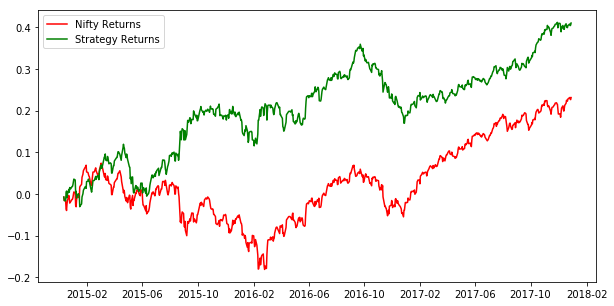

In [37]:
# 11) Creating trading strategy using the model

df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])
df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()